# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

### Importing the dataset

In [2]:
dataset = pd.read_excel('RPDataset4.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive type                   1540 non-null   object 
 1   Explosive mass                   1540 non-null   float64
 2   Perpendicular standoff distance  1540 non-null   float64
 3   Incident angle                   1540 non-null   int64  
 4   Peak reflected pressure          1540 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 60.3+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive mass                   1540 non-null   float64
 1   Perpendicular standoff distance  1540 non-null   float64
 2   Incident angle                   1540 non-null   int64  
 3   Peak reflected pressure          1540 non-null   float64
 4   Explosive type_Composition B     1540 non-null   uint8  
 5   Explosive type_TNT               1540 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 51.3 KB


In [4]:
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print(X.shape, y.shape)

(1540, 5) (1540,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

In [ ]:
X_test[:,0:3] = sc.transform(X_test[:, 0:3])
print (X_test)

In [ ]:
X_val[:,0:3] = sc.transform(X_val[:, 0:3])
print (X_val)

# Part 2 - Building the ANN

### Initializing the ANN

In [8]:
# Set seed for NumPy
np.random.seed(54)

# Set seed for TensorFlow
tf.random.set_seed(54)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(Dense(units=210,
              input_shape=(X_train.shape[1],),
              activation='relu'))
#ann.add(Dropout(0.1))

### Adding the second hidden layer

In [10]:
ann.add(Dense(units=210,
              activation='relu'))
#ann.add(Dropout(0.1))'))
#ann.add(Dropout(0.1))

### Adding the output layer

In [11]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 210)               1260      
                                                                 
 dense_1 (Dense)             (None, 210)               44310     
                                                                 
 dense_2 (Dense)             (None, 1)                 211       
                                                                 
Total params: 45781 (178.83 KB)
Trainable params: 45781 (178.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [13]:
opt = Nadam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)
#checkpoint_filepath = 'checkpoints'
#checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
#                    monitor="val_mae", mode="min", 
#                    save_best_only=True, verbose=1)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=500,
                    callbacks=[es],
                    batch_size=50,
                    verbose=1)
#ann.load_weights(checkpoint_filepath)

Epoch 1/500
22/22 [==============================] - 2s 16ms/step - loss: 532112.5000 - mae: 403.6746 - val_loss: 401880.3438 - val_mae: 413.7960
Epoch 2/500
22/22 [==============================] - 0s 5ms/step - loss: 279782.4375 - mae: 321.5096 - val_loss: 227138.2188 - val_mae: 280.7438
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 163379.6875 - mae: 212.7866 - val_loss: 156162.6719 - val_mae: 220.1444
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 122837.4531 - mae: 175.1145 - val_loss: 104319.9766 - val_mae: 160.3050
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 88335.5703 - mae: 142.8471 - val_loss: 71212.1875 - val_mae: 140.2255
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 62054.8242 - mae: 121.4866 - val_loss: 59475.4922 - val_mae: 121.7633
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 49482.5117 - mae: 107.8198 - val_loss: 44994.1445 - val_mae:

### Analyse learn history

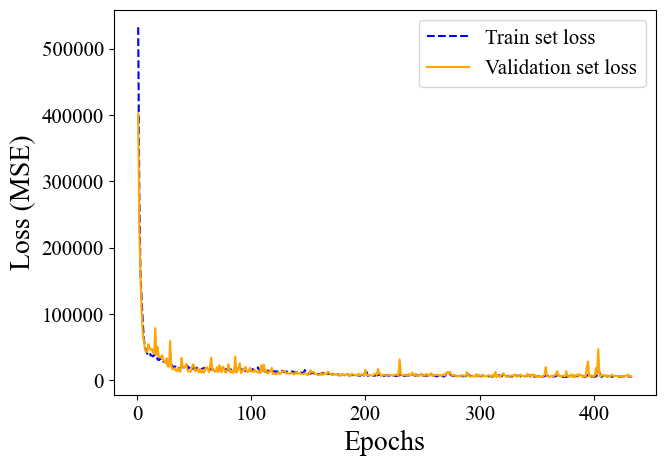

In [16]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss', linestyle='--')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss (MSE)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

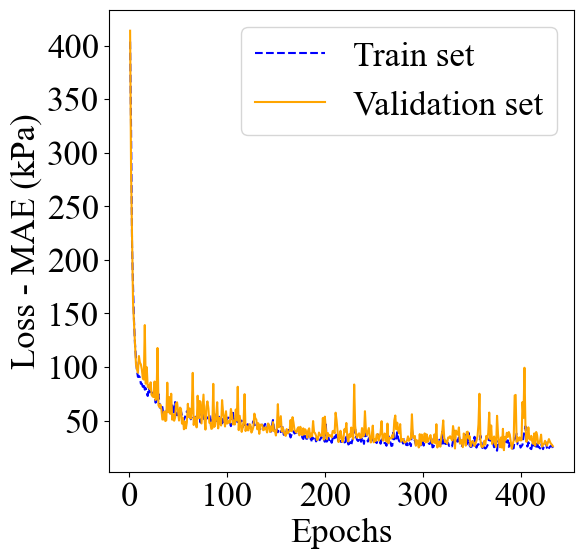

In [37]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(6,6))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set', linestyle='--')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 25)
plt.ylabel('Loss - MAE (kPa)', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc='upper right',fontsize = 25)
plt.savefig('MAE.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [32]:
# Convert arrays to DataFrames
df1 = pd.DataFrame(epochs)
df2 = pd.DataFrame(loss_values)
df3 = pd.DataFrame(val_loss_values)
df4 = pd.DataFrame(loss_values1)
df5 = pd.DataFrame(val_loss_values1)

# Concatenate DataFrames along the vertical axis
mse_df = pd.concat([df1, df2, df3], axis=1)
mae_df = pd.concat([df1, df4, df5], axis=1)

# Add labels to the DataFrame
mse_df.columns = ['Epochs', 'Train loss', 'Val loss']
mae_df.columns = ['Epochs', 'Train loss', 'Val loss']

# Save concatenated DataFrame to Excel file
mse_df.to_excel("MSE.xlsx", index=False)
mae_df.to_excel("MAE.xlsx", index=False)

In [ ]:
print (epochs)

# Part 4 - Make predictions

8/8 [==============================] - 0s 2ms/step


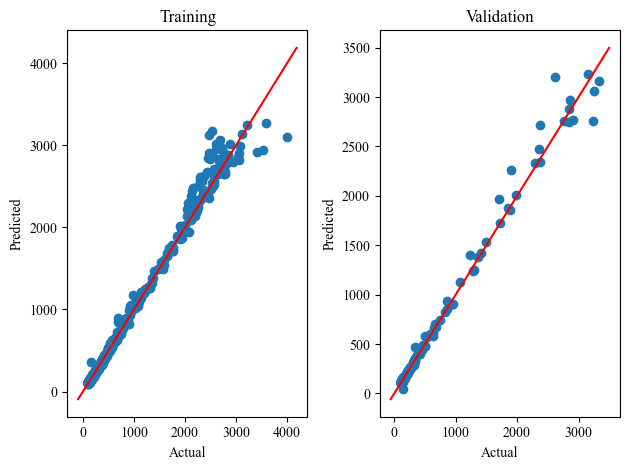

In [18]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [19]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

8/8 [==============================] - 0s 2ms/step


In [25]:
new = [[0.95, 2.3,0, 1, 0]]
new_pred = ann.predict(new)
print (new_pred)

1/1 [==============================] - 0s 95ms/step
[[443.66]]


Text(0, 0.5, 'Predicted data')

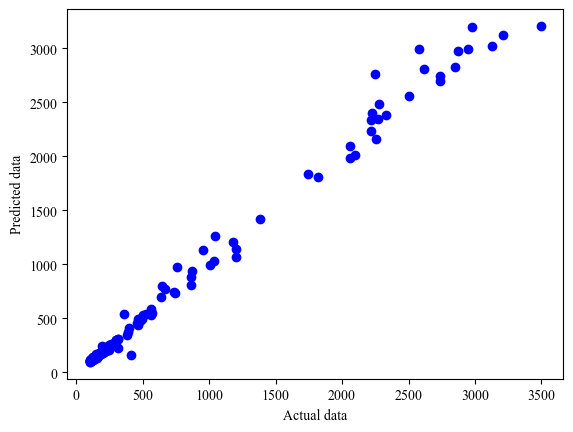

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,25000],[0,25000], color = "red")
#plt.axis ([0,25000,0,25000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

Text(0, 0.5, 'Predicted data')

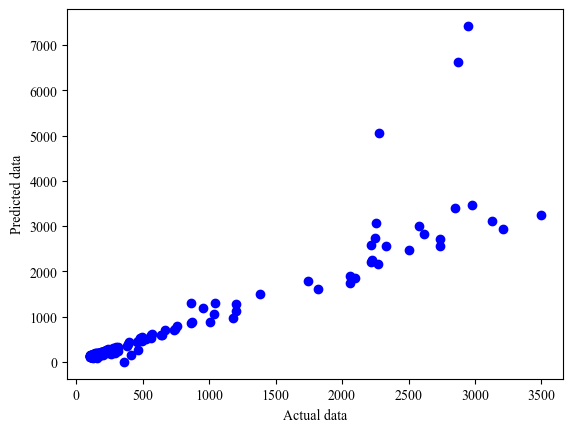

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,25000],[0,25000], color = "red")
#plt.axis ([0,25000,0,25000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

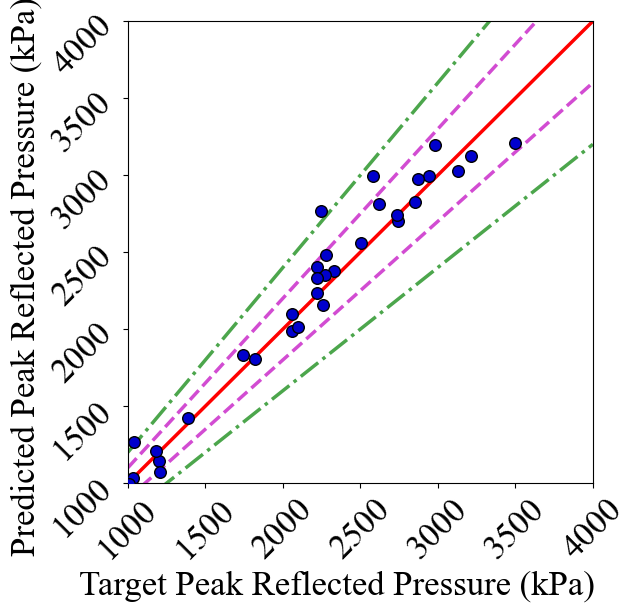

In [33]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')
# Set ylabel with adjusted position
ax1.set_ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25, y=0.45)
ax1.set_xlabel('Target Peak Reflected Pressure (kPa)',fontsize = 25, x=0.45)

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


#plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25)
#plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)
plt.yticks(fontsize = 25, rotation=45)


x1 = np.linspace(1000,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(1000, 4000)
plt.xlim(1000, 4000)
#plt.legend(loc='upper left',fontsize = 25)

#plt.grid()

# Set logarithmic scale
#plt.xscale('log')
#plt.yscale('log')

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')  #setting up above X-axis tick color to red
plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

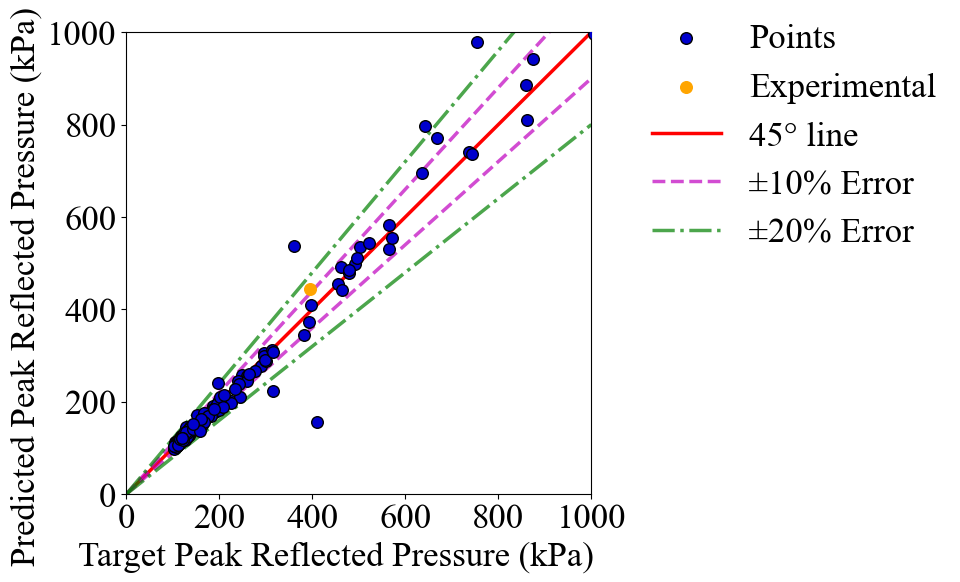

In [35]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')
ax1.scatter(394, 443, s=70, alpha=1, edgecolors=None,c='orange',zorder=5, label = 'Experimental')
ax1.set_ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25, y=0.45)
ax1.set_xlabel('Target Peak Reflected Pressure (kPa)',fontsize = 25, x=0.45)

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


#plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 24)
#plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


x1 = np.linspace(0,1000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 1000)
plt.xlim(0, 1000)
plt.legend(loc=[1.1, 0.5],fontsize = 25, frameon=False)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')    
plt.savefig('plot2.png', dpi = 600, bbox_inches = 'tight')
plt.show()#setting up above X-axis tick color to red

In [35]:
# Convert arrays to DataFrames with column labels
X_test_df = pd.DataFrame(X_test, columns = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Comp B', 'TNT'])
y_test_df = pd.DataFrame(y_test, columns = ['test'])
y_pred_df = pd.DataFrame(y_pred, columns = ['pred'])

# Concatenate DataFrames along the vertical axis
pred_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

# Save concatenated DataFrame to Excel file
pred_df.to_excel('pred_df.xlsx', index=False)

In [23]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

34/34 [==============================] - 0s 960us/step
21.541358037605356
26.781654966412166


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9916133447205454


In [25]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.990412487217503


In [26]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 92.64%
Within 20% margin 96.54%
Out of 20% margin 3.46%


In [27]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9914269746032242


In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

68.67424181673023

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

26.781654966412166

In [30]:
ann.save('Peak_Reflected_Pressure_ANN_2_nodrop_noscale.h5')

D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load saved model

In [18]:
ann = load_model('Peak_Reflected_Pressure_ANN_2_nodrop_noscale.h5')

## SHAP

In [37]:
dataset = pd.read_excel('RPDataset4.xlsx')
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print (X)

      Explosive mass  Perpendicular standoff distance  Incident angle  \
0                0.5                              2.0               0   
1                0.5                              2.0              15   
2                0.5                              2.0              30   
3                0.5                              2.0              45   
4                0.5                              2.0              60   
...              ...                              ...             ...   
1535            21.5                             20.0               0   
1536            21.5                             20.0              15   
1537            21.5                             20.0              30   
1538            21.5                             20.0              45   
1539            21.5                             20.0              60   

      Explosive type_Composition B  Explosive type_TNT  
0                                0                   1  
1        

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=71)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=71)

In [39]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

34/34 [==============================] - 0s 2ms/step


Using 1078 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1078 [00:00<?, ?it/s]

1011/1011 [==============================] - 1s 1ms/step


In [40]:
explainer2 = shap.Explainer(ann.predict, X_train)
shap_values2 = explainer2(X_train)

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   1%|          | 13/1078 [00:00<?, ?it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   1%|▏         | 15/1078 [00:10<03:11,  5.56it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   1%|▏         | 16/1078 [00:10<04:51,  3.65it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   2%|▏         | 17/1078 [00:11<05:15,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 18/1078 [00:11<05:46,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 19/1078 [00:11<05:52,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 20/1078 [00:12<05:50,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 21/1078 [00:12<05:48,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 22/1078 [00:12<06:04,  2.90it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   2%|▏         | 23/1078 [00:13<05:54,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 24/1078 [00:13<05:54,  2.97it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   2%|▏         | 25/1078 [00:13<05:41,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 26/1078 [00:14<05:32,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 27/1078 [00:14<05:41,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 28/1078 [00:14<05:51,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 29/1078 [00:15<05:49,  3.00it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   3%|▎         | 30/1078 [00:15<06:02,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 31/1078 [00:15<06:01,  2.90it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   3%|▎         | 32/1078 [00:16<05:55,  2.94it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   3%|▎         | 33/1078 [00:16<05:41,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 34/1078 [00:16<05:41,  3.05it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   3%|▎         | 35/1078 [00:17<05:22,  3.24it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   3%|▎         | 36/1078 [00:17<05:27,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 37/1078 [00:17<05:26,  3.18it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   4%|▎         | 38/1078 [00:18<05:30,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▎         | 39/1078 [00:18<05:19,  3.26it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   4%|▎         | 40/1078 [00:18<05:30,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   4%|▍         | 41/1078 [00:19<05:37,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▍         | 42/1078 [00:19<05:33,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▍         | 43/1078 [00:19<05:24,  3.19it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   4%|▍         | 44/1078 [00:20<05:15,  3.28it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   4%|▍         | 45/1078 [00:20<05:31,  3.11it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   4%|▍         | 46/1078 [00:20<05:28,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   4%|▍         | 47/1078 [00:20<05:21,  3.20it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   4%|▍         | 48/1078 [00:21<05:21,  3.20it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   5%|▍         | 49/1078 [00:21<05:26,  3.16it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   5%|▍         | 50/1078 [00:21<05:19,  3.21it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   5%|▍         | 51/1078 [00:22<05:39,  3.03it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   5%|▍         | 52/1078 [00:22<05:28,  3.12it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   5%|▍         | 53/1078 [00:22<05:25,  3.15it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   5%|▌         | 54/1078 [00:23<05:38,  3.03it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   5%|▌         | 55/1078 [00:23<05:37,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▌         | 56/1078 [00:23<05:36,  3.04it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   5%|▌         | 57/1078 [00:24<05:50,  2.92it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   5%|▌         | 58/1078 [00:24<05:45,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▌         | 59/1078 [00:24<05:51,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 60/1078 [00:25<05:31,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 61/1078 [00:25<05:17,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 62/1078 [00:25<05:12,  3.25it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   6%|▌         | 63/1078 [00:26<05:18,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 64/1078 [00:26<05:08,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 65/1078 [00:26<05:15,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 66/1078 [00:27<05:20,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 67/1078 [00:27<05:18,  3.17it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   6%|▋         | 68/1078 [00:27<05:17,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▋         | 69/1078 [00:28<05:16,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▋         | 70/1078 [00:28<05:11,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 71/1078 [00:28<05:07,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 72/1078 [00:28<05:05,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   7%|▋         | 73/1078 [00:29<05:16,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 74/1078 [00:29<05:19,  3.14it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   7%|▋         | 75/1078 [00:29<05:22,  3.11it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   7%|▋         | 76/1078 [00:30<05:14,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 77/1078 [00:30<05:18,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 78/1078 [00:30<05:26,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 79/1078 [00:31<05:12,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   7%|▋         | 80/1078 [00:31<05:11,  3.20it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   8%|▊         | 81/1078 [00:31<05:20,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 82/1078 [00:32<05:32,  3.00it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 83/1078 [00:32<05:36,  2.96it/s]

17/17 [==============================] - 0s 751us/step


ExactExplainer explainer:   8%|▊         | 84/1078 [00:32<05:34,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 85/1078 [00:33<05:28,  3.03it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 86/1078 [00:33<05:27,  3.03it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   8%|▊         | 87/1078 [00:33<05:17,  3.13it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   8%|▊         | 88/1078 [00:34<05:14,  3.15it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 89/1078 [00:34<05:21,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 90/1078 [00:34<05:13,  3.16it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 91/1078 [00:35<05:16,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▊         | 92/1078 [00:35<05:08,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   9%|▊         | 93/1078 [00:35<04:59,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▊         | 94/1078 [00:36<05:10,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▉         | 95/1078 [00:36<05:04,  3.23it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:   9%|▉         | 96/1078 [00:36<05:09,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▉         | 97/1078 [00:36<05:08,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▉         | 98/1078 [00:37<05:12,  3.14it/s]

17/17 [==============================] - 0s 971us/step


ExactExplainer explainer:   9%|▉         | 99/1078 [00:37<05:05,  3.20it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:   9%|▉         | 100/1078 [00:37<05:00,  3.25it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   9%|▉         | 101/1078 [00:38<05:11,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   9%|▉         | 102/1078 [00:38<05:13,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 103/1078 [00:38<05:10,  3.14it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|▉         | 104/1078 [00:39<05:08,  3.16it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|▉         | 105/1078 [00:39<05:16,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 106/1078 [00:39<05:03,  3.21it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  10%|▉         | 107/1078 [00:40<05:16,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|█         | 108/1078 [00:40<05:25,  2.98it/s]

17/17 [==============================] - 0s 595us/step


ExactExplainer explainer:  10%|█         | 109/1078 [00:40<05:12,  3.10it/s]

17/17 [==============================] - 0s 910us/step


ExactExplainer explainer:  10%|█         | 110/1078 [00:41<04:57,  3.26it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  10%|█         | 111/1078 [00:41<04:54,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  10%|█         | 112/1078 [00:41<04:51,  3.31it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|█         | 113/1078 [00:41<04:54,  3.28it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  11%|█         | 114/1078 [00:42<04:51,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 115/1078 [00:42<05:07,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 116/1078 [00:42<05:05,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 117/1078 [00:43<04:59,  3.21it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  11%|█         | 118/1078 [00:43<05:03,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  11%|█         | 119/1078 [00:43<05:15,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 120/1078 [00:44<05:28,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 121/1078 [00:44<05:23,  2.95it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  11%|█▏        | 122/1078 [00:44<05:14,  3.04it/s]

17/17 [==============================] - 0s 876us/step


ExactExplainer explainer:  11%|█▏        | 123/1078 [00:45<05:06,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 124/1078 [00:45<05:08,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 125/1078 [00:45<05:05,  3.12it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  12%|█▏        | 126/1078 [00:46<05:02,  3.15it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  12%|█▏        | 127/1078 [00:46<04:56,  3.21it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  12%|█▏        | 128/1078 [00:46<04:47,  3.31it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  12%|█▏        | 129/1078 [00:47<04:45,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 130/1078 [00:47<04:48,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 131/1078 [00:47<04:46,  3.31it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  12%|█▏        | 132/1078 [00:48<04:48,  3.28it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  12%|█▏        | 133/1078 [00:48<04:54,  3.20it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  12%|█▏        | 134/1078 [00:48<04:54,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 135/1078 [00:48<04:50,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 136/1078 [00:49<04:41,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 137/1078 [00:49<04:41,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 138/1078 [00:49<04:36,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 139/1078 [00:50<04:49,  3.24it/s]

17/17 [==============================] - 0s 911us/step


ExactExplainer explainer:  13%|█▎        | 140/1078 [00:50<04:54,  3.18it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  13%|█▎        | 141/1078 [00:50<04:45,  3.28it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  13%|█▎        | 142/1078 [00:51<04:56,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 143/1078 [00:51<05:03,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 144/1078 [00:51<04:56,  3.15it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  13%|█▎        | 145/1078 [00:52<04:47,  3.25it/s]

17/17 [==============================] - 0s 768us/step


ExactExplainer explainer:  14%|█▎        | 146/1078 [00:52<04:49,  3.22it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  14%|█▎        | 147/1078 [00:52<04:50,  3.20it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  14%|█▎        | 148/1078 [00:52<04:50,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 149/1078 [00:53<04:58,  3.11it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  14%|█▍        | 150/1078 [00:53<04:51,  3.18it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  14%|█▍        | 151/1078 [00:53<04:55,  3.14it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  14%|█▍        | 152/1078 [00:54<05:01,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 153/1078 [00:54<04:57,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 154/1078 [00:54<05:03,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 155/1078 [00:55<05:03,  3.05it/s]

17/17 [==============================] - 0s 999us/step


ExactExplainer explainer:  14%|█▍        | 156/1078 [00:55<04:50,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▍        | 157/1078 [00:55<04:50,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 158/1078 [00:56<04:41,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▍        | 159/1078 [00:56<04:40,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 160/1078 [00:56<04:42,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 161/1078 [00:57<04:47,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  15%|█▌        | 162/1078 [00:57<04:46,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  15%|█▌        | 163/1078 [00:57<04:55,  3.10it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  15%|█▌        | 164/1078 [00:58<04:43,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▌        | 165/1078 [00:58<04:43,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▌        | 166/1078 [00:58<04:48,  3.16it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  15%|█▌        | 167/1078 [00:59<04:55,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 168/1078 [00:59<04:51,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 169/1078 [00:59<04:40,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  16%|█▌        | 170/1078 [00:59<04:37,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 171/1078 [01:00<04:48,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  16%|█▌        | 172/1078 [01:00<04:48,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 173/1078 [01:00<04:56,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 174/1078 [01:01<04:57,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 175/1078 [01:01<04:46,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▋        | 176/1078 [01:01<04:45,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  16%|█▋        | 177/1078 [01:02<04:48,  3.13it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  17%|█▋        | 178/1078 [01:02<04:49,  3.10it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  17%|█▋        | 179/1078 [01:02<04:42,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 180/1078 [01:03<04:51,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 181/1078 [01:03<04:44,  3.15it/s]

17/17 [==============================] - 0s 783us/step


ExactExplainer explainer:  17%|█▋        | 182/1078 [01:03<04:44,  3.15it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  17%|█▋        | 183/1078 [01:04<04:39,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 184/1078 [01:04<04:39,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  17%|█▋        | 185/1078 [01:04<04:43,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 186/1078 [01:05<04:45,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 187/1078 [01:05<04:51,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 188/1078 [01:05<04:39,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 189/1078 [01:05<04:36,  3.21it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  18%|█▊        | 190/1078 [01:06<04:42,  3.15it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  18%|█▊        | 191/1078 [01:06<04:28,  3.30it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  18%|█▊        | 192/1078 [01:06<04:38,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 193/1078 [01:07<04:38,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 194/1078 [01:07<04:45,  3.10it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 195/1078 [01:07<04:50,  3.04it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  18%|█▊        | 196/1078 [01:08<04:46,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 197/1078 [01:08<04:42,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 198/1078 [01:08<04:44,  3.10it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  18%|█▊        | 199/1078 [01:09<04:45,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▊        | 200/1078 [01:09<05:02,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▊        | 201/1078 [01:09<04:49,  3.03it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▊        | 202/1078 [01:10<04:36,  3.16it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▉        | 203/1078 [01:10<04:28,  3.26it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  19%|█▉        | 204/1078 [01:10<04:30,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 205/1078 [01:11<04:28,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 206/1078 [01:11<04:42,  3.09it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  19%|█▉        | 207/1078 [01:11<04:50,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▉        | 208/1078 [01:12<04:40,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 209/1078 [01:12<04:50,  3.00it/s]

17/17 [==============================] - 0s 848us/step


ExactExplainer explainer:  19%|█▉        | 210/1078 [01:12<04:39,  3.10it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  20%|█▉        | 211/1078 [01:13<04:37,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 212/1078 [01:13<04:39,  3.10it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  20%|█▉        | 213/1078 [01:13<04:36,  3.13it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  20%|█▉        | 214/1078 [01:14<04:44,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 215/1078 [01:14<04:37,  3.11it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  20%|██        | 216/1078 [01:14<04:39,  3.08it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  20%|██        | 217/1078 [01:14<04:29,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  20%|██        | 218/1078 [01:15<04:18,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|██        | 219/1078 [01:15<04:29,  3.19it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  20%|██        | 220/1078 [01:15<04:20,  3.29it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  21%|██        | 221/1078 [01:16<04:30,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  21%|██        | 222/1078 [01:16<04:25,  3.22it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  21%|██        | 223/1078 [01:16<04:29,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 224/1078 [01:17<04:20,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 225/1078 [01:17<04:15,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 226/1078 [01:17<04:15,  3.33it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  21%|██        | 227/1078 [01:18<04:16,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  21%|██        | 228/1078 [01:18<04:07,  3.43it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  21%|██        | 229/1078 [01:18<04:18,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  21%|██▏       | 230/1078 [01:18<04:25,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██▏       | 231/1078 [01:19<04:29,  3.14it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  22%|██▏       | 232/1078 [01:19<04:35,  3.07it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  22%|██▏       | 233/1078 [01:19<04:23,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  22%|██▏       | 234/1078 [01:20<04:19,  3.25it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  22%|██▏       | 235/1078 [01:20<04:14,  3.31it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 236/1078 [01:20<04:30,  3.12it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  22%|██▏       | 237/1078 [01:21<04:20,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 238/1078 [01:21<04:20,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 239/1078 [01:21<04:15,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 240/1078 [01:22<04:22,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 241/1078 [01:22<04:30,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 242/1078 [01:22<04:28,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 243/1078 [01:23<04:26,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 244/1078 [01:23<04:30,  3.08it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 245/1078 [01:23<04:27,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 246/1078 [01:24<04:24,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 247/1078 [01:24<04:23,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 248/1078 [01:24<04:29,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 249/1078 [01:24<04:29,  3.07it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 250/1078 [01:25<04:24,  3.13it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 251/1078 [01:25<04:23,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 252/1078 [01:25<04:21,  3.16it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  23%|██▎       | 253/1078 [01:26<04:28,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▎       | 254/1078 [01:26<04:29,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▎       | 255/1078 [01:26<04:26,  3.09it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  24%|██▎       | 256/1078 [01:27<04:22,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  24%|██▍       | 257/1078 [01:27<04:13,  3.24it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  24%|██▍       | 258/1078 [01:27<04:07,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▍       | 259/1078 [01:28<04:10,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▍       | 260/1078 [01:28<04:28,  3.05it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  24%|██▍       | 261/1078 [01:28<04:24,  3.09it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  24%|██▍       | 262/1078 [01:29<04:19,  3.14it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  24%|██▍       | 263/1078 [01:29<04:13,  3.22it/s]

17/17 [==============================] - 0s 595us/step


ExactExplainer explainer:  24%|██▍       | 264/1078 [01:29<04:02,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  25%|██▍       | 265/1078 [01:30<04:20,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 266/1078 [01:30<04:18,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  25%|██▍       | 267/1078 [01:30<04:14,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 268/1078 [01:31<04:19,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 269/1078 [01:31<04:11,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 270/1078 [01:31<04:04,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 271/1078 [01:31<04:01,  3.34it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  25%|██▌       | 272/1078 [01:32<03:56,  3.40it/s]

17/17 [==============================] - 0s 595us/step


ExactExplainer explainer:  25%|██▌       | 273/1078 [01:32<04:00,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  25%|██▌       | 274/1078 [01:32<03:53,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 275/1078 [01:33<03:54,  3.42it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 276/1078 [01:33<04:10,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 277/1078 [01:33<04:25,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 278/1078 [01:34<04:34,  2.92it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 279/1078 [01:34<04:20,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  26%|██▌       | 280/1078 [01:34<04:24,  3.02it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  26%|██▌       | 281/1078 [01:35<04:17,  3.09it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 282/1078 [01:35<04:17,  3.10it/s]

17/17 [==============================] - 0s 776us/step


ExactExplainer explainer:  26%|██▋       | 283/1078 [01:35<04:13,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▋       | 284/1078 [01:36<04:37,  2.86it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  26%|██▋       | 285/1078 [01:36<04:34,  2.89it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 286/1078 [01:36<04:16,  3.09it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 287/1078 [01:37<04:13,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 288/1078 [01:37<04:03,  3.24it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 289/1078 [01:37<04:08,  3.18it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  27%|██▋       | 290/1078 [01:37<04:11,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 291/1078 [01:38<04:07,  3.18it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 292/1078 [01:38<04:10,  3.13it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  27%|██▋       | 293/1078 [01:38<04:02,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 294/1078 [01:39<03:55,  3.33it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 295/1078 [01:39<04:00,  3.26it/s]

17/17 [==============================] - 0s 689us/step


ExactExplainer explainer:  27%|██▋       | 296/1078 [01:39<03:58,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 297/1078 [01:40<03:57,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 298/1078 [01:40<04:06,  3.17it/s]

17/17 [==============================] - 0s 939us/step


ExactExplainer explainer:  28%|██▊       | 299/1078 [01:40<04:08,  3.13it/s]

17/17 [==============================] - 0s 657us/step


ExactExplainer explainer:  28%|██▊       | 300/1078 [01:41<04:20,  2.99it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  28%|██▊       | 301/1078 [01:41<04:19,  2.99it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  28%|██▊       | 302/1078 [01:41<04:08,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 303/1078 [01:42<04:11,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 304/1078 [01:42<04:01,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 305/1078 [01:42<04:04,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 306/1078 [01:43<03:56,  3.26it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  28%|██▊       | 307/1078 [01:43<03:48,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▊       | 308/1078 [01:43<04:01,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▊       | 309/1078 [01:43<03:57,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 310/1078 [01:44<03:57,  3.24it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  29%|██▉       | 311/1078 [01:44<03:59,  3.21it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 312/1078 [01:44<03:58,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 313/1078 [01:45<04:04,  3.13it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 314/1078 [01:45<04:02,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 315/1078 [01:45<03:57,  3.21it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  29%|██▉       | 316/1078 [01:46<03:57,  3.21it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  29%|██▉       | 317/1078 [01:46<03:53,  3.25it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  29%|██▉       | 318/1078 [01:46<03:58,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|██▉       | 319/1078 [01:47<03:54,  3.24it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  30%|██▉       | 320/1078 [01:47<03:58,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|██▉       | 321/1078 [01:47<04:01,  3.14it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  30%|██▉       | 322/1078 [01:48<03:59,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  30%|██▉       | 323/1078 [01:48<03:54,  3.22it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  30%|███       | 324/1078 [01:48<03:58,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|███       | 325/1078 [01:48<03:53,  3.22it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  30%|███       | 326/1078 [01:49<03:57,  3.17it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  30%|███       | 327/1078 [01:49<03:56,  3.18it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  30%|███       | 328/1078 [01:49<03:59,  3.14it/s]

17/17 [==============================] - 0s 720us/step


ExactExplainer explainer:  31%|███       | 329/1078 [01:50<03:53,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 330/1078 [01:50<04:00,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 331/1078 [01:50<03:59,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 332/1078 [01:51<03:56,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 333/1078 [01:51<03:54,  3.17it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  31%|███       | 334/1078 [01:51<04:04,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 335/1078 [01:52<04:01,  3.08it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  31%|███       | 336/1078 [01:52<03:53,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███▏      | 337/1078 [01:52<03:58,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███▏      | 338/1078 [01:53<03:57,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███▏      | 339/1078 [01:53<03:48,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 340/1078 [01:53<03:43,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 341/1078 [01:53<03:38,  3.37it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 342/1078 [01:54<03:40,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 343/1078 [01:54<03:35,  3.40it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  32%|███▏      | 344/1078 [01:54<03:52,  3.15it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  32%|███▏      | 345/1078 [01:55<03:48,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 346/1078 [01:55<03:45,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 347/1078 [01:55<03:44,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 348/1078 [01:56<03:36,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 349/1078 [01:56<03:39,  3.32it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  32%|███▏      | 350/1078 [01:56<03:42,  3.28it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  33%|███▎      | 351/1078 [01:57<03:36,  3.36it/s]

17/17 [==============================] - 0s 910us/step


ExactExplainer explainer:  33%|███▎      | 352/1078 [01:57<03:39,  3.31it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 353/1078 [01:57<03:40,  3.29it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  33%|███▎      | 354/1078 [01:57<03:42,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  33%|███▎      | 355/1078 [01:58<03:47,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 356/1078 [01:58<03:40,  3.27it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  33%|███▎      | 357/1078 [01:58<03:51,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 358/1078 [01:59<03:40,  3.27it/s]

17/17 [==============================] - 0s 845us/step


ExactExplainer explainer:  33%|███▎      | 359/1078 [01:59<03:43,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 360/1078 [01:59<03:44,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 361/1078 [02:00<03:35,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▎      | 362/1078 [02:00<03:35,  3.32it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  34%|███▎      | 363/1078 [02:00<03:44,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 364/1078 [02:01<03:43,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▍      | 365/1078 [02:01<03:36,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 366/1078 [02:01<03:31,  3.37it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 367/1078 [02:01<03:37,  3.27it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  34%|███▍      | 368/1078 [02:02<03:38,  3.24it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  34%|███▍      | 369/1078 [02:02<03:36,  3.28it/s]

17/17 [==============================] - 0s 845us/step


ExactExplainer explainer:  34%|███▍      | 370/1078 [02:02<03:33,  3.31it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 371/1078 [02:03<03:39,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▍      | 372/1078 [02:03<03:35,  3.27it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▍      | 373/1078 [02:03<03:42,  3.17it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▍      | 374/1078 [02:04<03:44,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▍      | 375/1078 [02:04<03:46,  3.11it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▍      | 376/1078 [02:04<03:54,  2.99it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▍      | 377/1078 [02:05<03:53,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▌      | 378/1078 [02:05<03:46,  3.09it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▌      | 379/1078 [02:05<03:50,  3.03it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▌      | 380/1078 [02:06<03:52,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▌      | 381/1078 [02:06<03:42,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 382/1078 [02:06<03:41,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▌      | 383/1078 [02:07<03:39,  3.17it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  36%|███▌      | 384/1078 [02:07<03:43,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 385/1078 [02:07<03:32,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▌      | 386/1078 [02:07<03:29,  3.31it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▌      | 387/1078 [02:08<03:29,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▌      | 388/1078 [02:08<03:32,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 389/1078 [02:08<03:27,  3.32it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  36%|███▌      | 390/1078 [02:09<03:31,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▋      | 391/1078 [02:09<03:30,  3.27it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▋      | 392/1078 [02:09<03:28,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▋      | 393/1078 [02:10<03:31,  3.23it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  37%|███▋      | 394/1078 [02:10<03:35,  3.17it/s]

17/17 [==============================] - 0s 724us/step


ExactExplainer explainer:  37%|███▋      | 395/1078 [02:10<03:29,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 396/1078 [02:11<03:25,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 397/1078 [02:11<03:32,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 398/1078 [02:11<03:33,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 399/1078 [02:11<03:29,  3.24it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  37%|███▋      | 400/1078 [02:12<03:36,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 401/1078 [02:12<03:31,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 402/1078 [02:12<03:27,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 403/1078 [02:13<03:25,  3.28it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 404/1078 [02:13<03:27,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 405/1078 [02:13<03:34,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 406/1078 [02:14<03:38,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 407/1078 [02:14<03:26,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 408/1078 [02:14<03:37,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 409/1078 [02:15<03:30,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 410/1078 [02:15<03:26,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 411/1078 [02:15<03:28,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  38%|███▊      | 412/1078 [02:16<03:22,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 413/1078 [02:16<03:18,  3.35it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  38%|███▊      | 414/1078 [02:16<03:29,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 415/1078 [02:16<03:29,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 416/1078 [02:17<03:28,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 417/1078 [02:17<03:42,  2.97it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  39%|███▉      | 418/1078 [02:18<03:47,  2.90it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  39%|███▉      | 419/1078 [02:18<03:34,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 420/1078 [02:18<03:34,  3.06it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 421/1078 [02:18<03:26,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 422/1078 [02:19<03:28,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 423/1078 [02:19<03:28,  3.15it/s]

17/17 [==============================] - 0s 314us/step


ExactExplainer explainer:  39%|███▉      | 424/1078 [02:19<03:26,  3.17it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 425/1078 [02:20<03:26,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 426/1078 [02:20<03:20,  3.26it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  40%|███▉      | 427/1078 [02:20<03:17,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|███▉      | 428/1078 [02:21<03:25,  3.16it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|███▉      | 429/1078 [02:21<03:18,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 430/1078 [02:21<03:22,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|███▉      | 431/1078 [02:22<03:30,  3.08it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  40%|████      | 432/1078 [02:22<03:22,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 433/1078 [02:23<04:34,  2.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 434/1078 [02:23<04:27,  2.41it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  40%|████      | 435/1078 [02:23<04:09,  2.57it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|████      | 436/1078 [02:24<03:45,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 437/1078 [02:24<03:30,  3.05it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  41%|████      | 438/1078 [02:24<03:29,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 439/1078 [02:24<03:29,  3.04it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████      | 440/1078 [02:25<03:19,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 441/1078 [02:25<03:24,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 442/1078 [02:25<03:28,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 443/1078 [02:26<03:22,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 444/1078 [02:26<03:26,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  41%|████▏     | 445/1078 [02:26<03:33,  2.97it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████▏     | 446/1078 [02:27<03:21,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████▏     | 447/1078 [02:27<03:11,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 448/1078 [02:27<03:16,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 449/1078 [02:28<03:16,  3.20it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  42%|████▏     | 450/1078 [02:28<03:10,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 451/1078 [02:28<03:16,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  42%|████▏     | 452/1078 [02:29<03:16,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 453/1078 [02:29<03:13,  3.22it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  42%|████▏     | 454/1078 [02:29<03:05,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 455/1078 [02:29<03:10,  3.27it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  42%|████▏     | 456/1078 [02:30<03:04,  3.37it/s]

17/17 [==============================] - 0s 720us/step


ExactExplainer explainer:  42%|████▏     | 457/1078 [02:30<03:00,  3.43it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  42%|████▏     | 458/1078 [02:30<02:59,  3.46it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  43%|████▎     | 459/1078 [02:31<03:00,  3.43it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 460/1078 [02:31<03:01,  3.40it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 461/1078 [02:31<03:01,  3.41it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 462/1078 [02:32<03:04,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 463/1078 [02:32<03:01,  3.38it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  43%|████▎     | 464/1078 [02:32<03:12,  3.19it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  43%|████▎     | 465/1078 [02:32<03:14,  3.15it/s]

17/17 [==============================] - 0s 532us/step


ExactExplainer explainer:  43%|████▎     | 466/1078 [02:33<03:09,  3.23it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  43%|████▎     | 467/1078 [02:33<03:03,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 468/1078 [02:33<03:00,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 469/1078 [02:34<03:01,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 470/1078 [02:34<03:14,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 471/1078 [02:34<03:13,  3.14it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  44%|████▍     | 472/1078 [02:35<03:08,  3.21it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  44%|████▍     | 473/1078 [02:35<03:04,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 474/1078 [02:35<03:01,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 475/1078 [02:36<03:20,  3.01it/s]

17/17 [==============================] - 0s 876us/step


ExactExplainer explainer:  44%|████▍     | 476/1078 [02:36<03:12,  3.14it/s]

17/17 [==============================] - 0s 751us/step


ExactExplainer explainer:  44%|████▍     | 477/1078 [02:36<03:05,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 478/1078 [02:37<03:09,  3.17it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  44%|████▍     | 479/1078 [02:37<03:02,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 480/1078 [02:37<03:03,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▍     | 481/1078 [02:37<03:10,  3.14it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  45%|████▍     | 482/1078 [02:38<03:21,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 483/1078 [02:38<03:17,  3.02it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  45%|████▍     | 484/1078 [02:39<03:22,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▍     | 485/1078 [02:39<03:22,  2.93it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 486/1078 [02:39<03:11,  3.09it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  45%|████▌     | 487/1078 [02:39<03:09,  3.12it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  45%|████▌     | 488/1078 [02:40<03:02,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 489/1078 [02:40<02:58,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 490/1078 [02:40<03:03,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 491/1078 [02:41<03:03,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 492/1078 [02:41<03:13,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 493/1078 [02:41<03:05,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 494/1078 [02:42<03:06,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 495/1078 [02:42<03:02,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  46%|████▌     | 496/1078 [02:42<02:57,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 497/1078 [02:43<03:03,  3.16it/s]

17/17 [==============================] - 0s 681us/step


ExactExplainer explainer:  46%|████▌     | 498/1078 [02:43<02:58,  3.25it/s]

17/17 [==============================] - 0s 974us/step


ExactExplainer explainer:  46%|████▋     | 499/1078 [02:43<02:59,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  46%|████▋     | 500/1078 [02:43<02:56,  3.28it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  46%|████▋     | 501/1078 [02:44<02:50,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 502/1078 [02:44<02:58,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 503/1078 [02:44<02:54,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 504/1078 [02:45<02:51,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 505/1078 [02:45<02:50,  3.36it/s]

17/17 [==============================] - 0s 626us/step


ExactExplainer explainer:  47%|████▋     | 506/1078 [02:45<02:46,  3.43it/s]

17/17 [==============================] - 0s 930us/step


ExactExplainer explainer:  47%|████▋     | 507/1078 [02:46<02:50,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 508/1078 [02:46<02:45,  3.45it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 509/1078 [02:46<02:43,  3.48it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 510/1078 [02:46<02:42,  3.51it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 511/1078 [02:47<02:41,  3.52it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 512/1078 [02:47<02:53,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 513/1078 [02:47<02:56,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 514/1078 [02:48<03:01,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 515/1078 [02:48<02:54,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 516/1078 [02:48<02:54,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 517/1078 [02:49<02:53,  3.24it/s]

17/17 [==============================] - 0s 876us/step


ExactExplainer explainer:  48%|████▊     | 518/1078 [02:49<02:44,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 519/1078 [02:49<02:42,  3.45it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 520/1078 [02:49<02:38,  3.53it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 521/1078 [02:50<02:42,  3.43it/s]

17/17 [==============================] - 0s 845us/step


ExactExplainer explainer:  48%|████▊     | 522/1078 [02:50<02:40,  3.47it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▊     | 523/1078 [02:50<02:41,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▊     | 524/1078 [02:51<02:39,  3.47it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▊     | 525/1078 [02:51<02:38,  3.50it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  49%|████▉     | 526/1078 [02:51<02:37,  3.51it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 527/1078 [02:51<02:41,  3.41it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 528/1078 [02:52<02:42,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 529/1078 [02:52<02:41,  3.40it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 530/1078 [02:52<02:39,  3.44it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  49%|████▉     | 531/1078 [02:53<02:42,  3.37it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  49%|████▉     | 532/1078 [02:53<02:42,  3.37it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  49%|████▉     | 533/1078 [02:53<02:44,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 534/1078 [02:54<02:45,  3.28it/s]

17/17 [==============================] - 0s 814us/step


ExactExplainer explainer:  50%|████▉     | 535/1078 [02:54<02:40,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|████▉     | 536/1078 [02:54<02:42,  3.35it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|████▉     | 537/1078 [02:54<02:39,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 538/1078 [02:55<02:36,  3.46it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|█████     | 539/1078 [02:55<02:38,  3.40it/s]

17/17 [==============================] - 0s 848us/step


ExactExplainer explainer:  50%|█████     | 540/1078 [02:55<02:34,  3.48it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  50%|█████     | 541/1078 [02:56<02:30,  3.56it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  50%|█████     | 542/1078 [02:56<02:33,  3.50it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 543/1078 [02:56<02:32,  3.52it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 544/1078 [02:56<02:31,  3.53it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 545/1078 [02:57<02:34,  3.45it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 546/1078 [02:57<02:36,  3.40it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 547/1078 [02:57<02:34,  3.44it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 548/1078 [02:58<02:32,  3.48it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  51%|█████     | 549/1078 [02:58<02:33,  3.44it/s]

17/17 [==============================] - 0s 567us/step


ExactExplainer explainer:  51%|█████     | 550/1078 [02:58<02:40,  3.28it/s]

17/17 [==============================] - 0s 922us/step


ExactExplainer explainer:  51%|█████     | 551/1078 [02:58<02:35,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 552/1078 [02:59<02:37,  3.33it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████▏    | 553/1078 [02:59<02:35,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████▏    | 554/1078 [02:59<02:36,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████▏    | 555/1078 [03:00<02:40,  3.26it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  52%|█████▏    | 556/1078 [03:00<02:34,  3.38it/s]

17/17 [==============================] - 0s 907us/step


ExactExplainer explainer:  52%|█████▏    | 557/1078 [03:00<02:38,  3.28it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  52%|█████▏    | 558/1078 [03:01<02:35,  3.35it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  52%|█████▏    | 559/1078 [03:01<02:34,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 560/1078 [03:01<02:38,  3.27it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  52%|█████▏    | 561/1078 [03:01<02:33,  3.37it/s]

17/17 [==============================] - 0s 751us/step


ExactExplainer explainer:  52%|█████▏    | 562/1078 [03:02<02:29,  3.45it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 563/1078 [03:02<02:28,  3.48it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 564/1078 [03:02<02:34,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 565/1078 [03:03<02:38,  3.23it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  53%|█████▎    | 566/1078 [03:03<02:33,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 567/1078 [03:03<02:33,  3.34it/s]

17/17 [==============================] - 0s 502us/step


ExactExplainer explainer:  53%|█████▎    | 568/1078 [03:04<02:38,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 569/1078 [03:04<02:39,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 570/1078 [03:04<02:33,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 571/1078 [03:05<02:35,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 572/1078 [03:05<02:40,  3.15it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 573/1078 [03:05<02:42,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 574/1078 [03:06<02:43,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 575/1078 [03:06<02:40,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 576/1078 [03:06<02:37,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▎    | 577/1078 [03:06<02:34,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▎    | 578/1078 [03:07<02:37,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▎    | 579/1078 [03:07<02:35,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 580/1078 [03:07<02:35,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 581/1078 [03:08<02:38,  3.14it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  54%|█████▍    | 582/1078 [03:08<02:32,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 583/1078 [03:08<02:30,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 584/1078 [03:09<02:33,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 585/1078 [03:09<02:40,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  54%|█████▍    | 586/1078 [03:09<02:38,  3.10it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  54%|█████▍    | 587/1078 [03:10<02:33,  3.21it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  55%|█████▍    | 588/1078 [03:10<02:27,  3.31it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  55%|█████▍    | 589/1078 [03:10<02:32,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  55%|█████▍    | 590/1078 [03:11<02:37,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 591/1078 [03:11<02:31,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 592/1078 [03:11<02:36,  3.10it/s]

17/17 [==============================] - 0s 845us/step


ExactExplainer explainer:  55%|█████▌    | 593/1078 [03:11<02:31,  3.21it/s]

17/17 [==============================] - 0s 415us/step


ExactExplainer explainer:  55%|█████▌    | 594/1078 [03:12<02:30,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 595/1078 [03:12<02:35,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 596/1078 [03:12<02:29,  3.22it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  55%|█████▌    | 597/1078 [03:13<02:29,  3.22it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  55%|█████▌    | 598/1078 [03:13<02:27,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 599/1078 [03:13<02:23,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▌    | 600/1078 [03:14<02:20,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 601/1078 [03:14<02:18,  3.45it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▌    | 602/1078 [03:14<02:21,  3.37it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  56%|█████▌    | 603/1078 [03:14<02:20,  3.37it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  56%|█████▌    | 604/1078 [03:15<02:18,  3.42it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  56%|█████▌    | 605/1078 [03:15<02:14,  3.52it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 606/1078 [03:15<02:26,  3.21it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  56%|█████▋    | 607/1078 [03:16<02:24,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▋    | 608/1078 [03:16<02:21,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▋    | 609/1078 [03:16<02:23,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 610/1078 [03:17<02:20,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 611/1078 [03:17<02:24,  3.23it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  57%|█████▋    | 612/1078 [03:17<02:26,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 613/1078 [03:18<02:21,  3.29it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  57%|█████▋    | 614/1078 [03:18<02:24,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 615/1078 [03:18<02:23,  3.23it/s]

17/17 [==============================] - 0s 907us/step


ExactExplainer explainer:  57%|█████▋    | 616/1078 [03:18<02:19,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 617/1078 [03:19<02:27,  3.13it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  57%|█████▋    | 618/1078 [03:19<02:21,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  57%|█████▋    | 619/1078 [03:19<02:22,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 620/1078 [03:20<02:24,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 621/1078 [03:20<02:22,  3.21it/s]

17/17 [==============================] - 0s 501us/step


ExactExplainer explainer:  58%|█████▊    | 622/1078 [03:20<02:22,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 623/1078 [03:21<02:18,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 624/1078 [03:21<02:13,  3.41it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  58%|█████▊    | 625/1078 [03:21<02:13,  3.39it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 626/1078 [03:21<02:14,  3.36it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  58%|█████▊    | 627/1078 [03:22<02:16,  3.29it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  58%|█████▊    | 628/1078 [03:22<02:13,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 629/1078 [03:22<02:15,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 630/1078 [03:23<02:16,  3.27it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  59%|█████▊    | 631/1078 [03:23<02:13,  3.36it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  59%|█████▊    | 632/1078 [03:23<02:14,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▊    | 633/1078 [03:24<02:13,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 634/1078 [03:24<02:17,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  59%|█████▉    | 635/1078 [03:24<02:17,  3.21it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  59%|█████▉    | 636/1078 [03:25<02:14,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 637/1078 [03:25<02:17,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 638/1078 [03:25<02:19,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 639/1078 [03:25<02:14,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 640/1078 [03:26<02:19,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 641/1078 [03:26<02:16,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 642/1078 [03:26<02:20,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 643/1078 [03:27<02:24,  3.01it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  60%|█████▉    | 644/1078 [03:27<02:21,  3.06it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  60%|█████▉    | 645/1078 [03:27<02:15,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 646/1078 [03:28<02:21,  3.06it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  60%|██████    | 647/1078 [03:28<02:21,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 648/1078 [03:28<02:18,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 649/1078 [03:29<02:13,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 650/1078 [03:29<02:14,  3.19it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  60%|██████    | 651/1078 [03:29<02:14,  3.18it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  60%|██████    | 652/1078 [03:30<02:07,  3.33it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  61%|██████    | 653/1078 [03:30<02:13,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 654/1078 [03:30<02:10,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 655/1078 [03:31<02:15,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 656/1078 [03:31<02:16,  3.09it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 657/1078 [03:31<02:10,  3.24it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  61%|██████    | 658/1078 [03:32<02:12,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 659/1078 [03:32<02:09,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 660/1078 [03:32<02:09,  3.22it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  61%|██████▏   | 661/1078 [03:32<02:06,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████▏   | 662/1078 [03:33<02:04,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 663/1078 [03:33<02:09,  3.19it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  62%|██████▏   | 664/1078 [03:33<02:13,  3.10it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  62%|██████▏   | 665/1078 [03:34<02:06,  3.28it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  62%|██████▏   | 666/1078 [03:34<02:08,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 667/1078 [03:34<02:07,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 668/1078 [03:35<02:03,  3.31it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 669/1078 [03:35<02:05,  3.26it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  62%|██████▏   | 670/1078 [03:35<02:04,  3.29it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  62%|██████▏   | 671/1078 [03:35<02:00,  3.37it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  62%|██████▏   | 672/1078 [03:36<02:05,  3.24it/s]

17/17 [==============================] - 0s 938us/step


ExactExplainer explainer:  62%|██████▏   | 673/1078 [03:36<01:58,  3.41it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  63%|██████▎   | 674/1078 [03:36<01:58,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 675/1078 [03:37<01:57,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 676/1078 [03:37<02:01,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 677/1078 [03:37<02:02,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 678/1078 [03:38<01:59,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 679/1078 [03:38<01:56,  3.41it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  63%|██████▎   | 680/1078 [03:38<01:58,  3.35it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  63%|██████▎   | 681/1078 [03:39<02:03,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 682/1078 [03:39<01:59,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 683/1078 [03:39<01:57,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 684/1078 [03:39<01:58,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  64%|██████▎   | 685/1078 [03:40<02:00,  3.27it/s]

17/17 [==============================] - 0s 407us/step


ExactExplainer explainer:  64%|██████▎   | 686/1078 [03:40<01:57,  3.34it/s]

17/17 [==============================] - 0s 595us/step


ExactExplainer explainer:  64%|██████▎   | 687/1078 [03:40<01:55,  3.39it/s]

17/17 [==============================] - 0s 936us/step


ExactExplainer explainer:  64%|██████▍   | 688/1078 [03:41<01:54,  3.42it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 689/1078 [03:41<01:50,  3.52it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  64%|██████▍   | 690/1078 [03:41<01:53,  3.41it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 691/1078 [03:41<01:57,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 692/1078 [03:42<01:56,  3.32it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  64%|██████▍   | 693/1078 [03:42<01:53,  3.39it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  64%|██████▍   | 694/1078 [03:42<01:53,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 695/1078 [03:43<02:00,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▍   | 696/1078 [03:43<01:56,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▍   | 697/1078 [03:43<01:52,  3.40it/s]

17/17 [==============================] - 0s 564us/step


ExactExplainer explainer:  65%|██████▍   | 698/1078 [03:44<01:56,  3.27it/s]

17/17 [==============================] - 0s 439us/step


ExactExplainer explainer:  65%|██████▍   | 699/1078 [03:44<01:52,  3.36it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▍   | 700/1078 [03:44<01:49,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 701/1078 [03:44<01:50,  3.42it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  65%|██████▌   | 702/1078 [03:45<01:52,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  65%|██████▌   | 703/1078 [03:45<01:53,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▌   | 704/1078 [03:45<01:56,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 705/1078 [03:46<02:00,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 706/1078 [03:46<01:57,  3.16it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▌   | 707/1078 [03:46<01:56,  3.18it/s]

17/17 [==============================] - 0s 214us/step


ExactExplainer explainer:  66%|██████▌   | 708/1078 [03:47<01:52,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 709/1078 [03:47<01:53,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 710/1078 [03:47<01:54,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 711/1078 [03:48<01:53,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 712/1078 [03:48<01:49,  3.33it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  66%|██████▌   | 713/1078 [03:48<01:47,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 714/1078 [03:48<01:51,  3.27it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▋   | 715/1078 [03:49<01:48,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▋   | 716/1078 [03:49<01:55,  3.13it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  67%|██████▋   | 717/1078 [03:49<01:51,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 718/1078 [03:50<01:53,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 719/1078 [03:50<01:54,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 720/1078 [03:50<01:50,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  67%|██████▋   | 721/1078 [03:51<01:45,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 722/1078 [03:51<01:43,  3.43it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 723/1078 [03:51<01:49,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 724/1078 [03:52<01:45,  3.36it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  67%|██████▋   | 725/1078 [03:52<01:43,  3.42it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 726/1078 [03:52<01:49,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 727/1078 [03:52<01:45,  3.34it/s]

17/17 [==============================] - 0s 938us/step


ExactExplainer explainer:  68%|██████▊   | 728/1078 [03:53<01:47,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  68%|██████▊   | 729/1078 [03:53<01:46,  3.28it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 730/1078 [03:53<01:44,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 731/1078 [03:54<01:49,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 732/1078 [03:54<01:45,  3.28it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  68%|██████▊   | 733/1078 [03:54<01:42,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 734/1078 [03:55<01:43,  3.31it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  68%|██████▊   | 735/1078 [03:55<01:41,  3.38it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  68%|██████▊   | 736/1078 [03:55<01:46,  3.22it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  68%|██████▊   | 737/1078 [03:55<01:41,  3.37it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  68%|██████▊   | 738/1078 [03:56<01:44,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▊   | 739/1078 [03:56<01:49,  3.10it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  69%|██████▊   | 740/1078 [03:56<01:44,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▊   | 741/1078 [03:57<01:44,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 742/1078 [03:57<01:43,  3.26it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  69%|██████▉   | 743/1078 [03:57<01:46,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 744/1078 [03:58<01:47,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▉   | 745/1078 [03:58<01:41,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 746/1078 [03:58<01:40,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▉   | 747/1078 [03:59<01:37,  3.38it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  69%|██████▉   | 748/1078 [03:59<01:39,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 749/1078 [03:59<01:37,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|██████▉   | 750/1078 [03:59<01:38,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 751/1078 [04:00<01:39,  3.30it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  70%|██████▉   | 752/1078 [04:00<01:38,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 753/1078 [04:00<01:36,  3.35it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  70%|██████▉   | 754/1078 [04:01<01:36,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 755/1078 [04:01<01:35,  3.39it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 756/1078 [04:01<01:35,  3.37it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 757/1078 [04:02<01:33,  3.45it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|███████   | 758/1078 [04:02<01:36,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 759/1078 [04:02<01:33,  3.40it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  71%|███████   | 760/1078 [04:02<01:32,  3.43it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  71%|███████   | 761/1078 [04:03<01:32,  3.41it/s]

17/17 [==============================] - 0s 942us/step


ExactExplainer explainer:  71%|███████   | 762/1078 [04:03<01:31,  3.45it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  71%|███████   | 763/1078 [04:03<01:34,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 764/1078 [04:04<01:37,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 765/1078 [04:04<01:41,  3.08it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 766/1078 [04:04<01:39,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 767/1078 [04:05<01:37,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 768/1078 [04:05<01:37,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  71%|███████▏  | 769/1078 [04:05<01:38,  3.14it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  71%|███████▏  | 770/1078 [04:06<01:37,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 771/1078 [04:06<01:33,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 772/1078 [04:06<01:34,  3.25it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  72%|███████▏  | 773/1078 [04:06<01:31,  3.33it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  72%|███████▏  | 774/1078 [04:07<01:30,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 775/1078 [04:07<01:33,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 776/1078 [04:07<01:33,  3.24it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  72%|███████▏  | 777/1078 [04:08<01:31,  3.27it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  72%|███████▏  | 778/1078 [04:08<01:30,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 779/1078 [04:08<01:30,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 780/1078 [04:09<01:34,  3.14it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  72%|███████▏  | 781/1078 [04:09<01:39,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 782/1078 [04:09<01:37,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 783/1078 [04:10<01:32,  3.18it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  73%|███████▎  | 784/1078 [04:10<01:32,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 785/1078 [04:10<01:32,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 786/1078 [04:11<01:29,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 787/1078 [04:11<01:25,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 788/1078 [04:11<01:26,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 789/1078 [04:11<01:29,  3.23it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  73%|███████▎  | 790/1078 [04:12<01:25,  3.38it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  73%|███████▎  | 791/1078 [04:12<01:27,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 792/1078 [04:12<01:32,  3.09it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▎  | 793/1078 [04:13<01:29,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▎  | 794/1078 [04:13<01:26,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▎  | 795/1078 [04:13<01:29,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 796/1078 [04:14<01:28,  3.17it/s]

17/17 [==============================] - 0s 943us/step


ExactExplainer explainer:  74%|███████▍  | 797/1078 [04:14<01:28,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 798/1078 [04:14<01:29,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 799/1078 [04:15<01:27,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 800/1078 [04:15<01:24,  3.31it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  74%|███████▍  | 801/1078 [04:15<01:22,  3.38it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  74%|███████▍  | 802/1078 [04:15<01:26,  3.17it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  74%|███████▍  | 803/1078 [04:16<01:23,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▍  | 804/1078 [04:16<01:21,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▍  | 805/1078 [04:16<01:18,  3.46it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▍  | 806/1078 [04:17<01:17,  3.50it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▍  | 807/1078 [04:17<01:16,  3.53it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  75%|███████▍  | 808/1078 [04:17<01:16,  3.52it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 809/1078 [04:18<01:24,  3.17it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  75%|███████▌  | 810/1078 [04:18<01:20,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 811/1078 [04:18<01:20,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 812/1078 [04:18<01:20,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▌  | 813/1078 [04:19<01:21,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 814/1078 [04:19<01:22,  3.22it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  76%|███████▌  | 815/1078 [04:19<01:22,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  76%|███████▌  | 816/1078 [04:20<01:20,  3.24it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  76%|███████▌  | 817/1078 [04:20<01:17,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 818/1078 [04:20<01:20,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 819/1078 [04:21<01:19,  3.27it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  76%|███████▌  | 820/1078 [04:21<01:15,  3.40it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  76%|███████▌  | 821/1078 [04:21<01:15,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▋  | 822/1078 [04:21<01:13,  3.49it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  76%|███████▋  | 823/1078 [04:22<01:13,  3.45it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  76%|███████▋  | 824/1078 [04:22<01:12,  3.48it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 825/1078 [04:22<01:12,  3.51it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  77%|███████▋  | 826/1078 [04:23<01:18,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  77%|███████▋  | 827/1078 [04:23<01:16,  3.30it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  77%|███████▋  | 828/1078 [04:23<01:16,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 829/1078 [04:24<01:15,  3.30it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  77%|███████▋  | 830/1078 [04:24<01:13,  3.37it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 831/1078 [04:24<01:12,  3.42it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  77%|███████▋  | 832/1078 [04:24<01:11,  3.46it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 833/1078 [04:25<01:14,  3.28it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  77%|███████▋  | 834/1078 [04:25<01:13,  3.30it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  77%|███████▋  | 835/1078 [04:25<01:13,  3.32it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  78%|███████▊  | 836/1078 [04:26<01:11,  3.39it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  78%|███████▊  | 837/1078 [04:26<01:10,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 838/1078 [04:26<01:11,  3.36it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  78%|███████▊  | 839/1078 [04:26<01:11,  3.36it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  78%|███████▊  | 840/1078 [04:27<01:10,  3.37it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  78%|███████▊  | 841/1078 [04:27<01:10,  3.37it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  78%|███████▊  | 842/1078 [04:27<01:16,  3.08it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  78%|███████▊  | 843/1078 [04:28<01:14,  3.16it/s]

17/17 [==============================] - 0s 379us/step


ExactExplainer explainer:  78%|███████▊  | 844/1078 [04:28<01:10,  3.30it/s]

17/17 [==============================] - 0s 720us/step


ExactExplainer explainer:  78%|███████▊  | 845/1078 [04:28<01:12,  3.20it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  78%|███████▊  | 846/1078 [04:29<01:11,  3.24it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  79%|███████▊  | 847/1078 [04:29<01:10,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▊  | 848/1078 [04:29<01:08,  3.36it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  79%|███████▉  | 849/1078 [04:30<01:10,  3.26it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  79%|███████▉  | 850/1078 [04:30<01:12,  3.14it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  79%|███████▉  | 851/1078 [04:30<01:08,  3.31it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  79%|███████▉  | 852/1078 [04:30<01:09,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 853/1078 [04:31<01:08,  3.30it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  79%|███████▉  | 854/1078 [04:31<01:08,  3.28it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  79%|███████▉  | 855/1078 [04:31<01:12,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 856/1078 [04:32<01:12,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 857/1078 [04:32<01:14,  2.97it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  80%|███████▉  | 858/1078 [04:32<01:11,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 859/1078 [04:33<01:13,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 860/1078 [04:33<01:09,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 861/1078 [04:33<01:11,  3.01it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  80%|███████▉  | 862/1078 [04:34<01:11,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|████████  | 863/1078 [04:34<01:10,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|████████  | 864/1078 [04:34<01:07,  3.17it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  80%|████████  | 865/1078 [04:35<01:05,  3.26it/s]

17/17 [==============================] - 0s 629us/step


ExactExplainer explainer:  80%|████████  | 866/1078 [04:35<01:03,  3.33it/s]

17/17 [==============================] - 0s 908us/step


ExactExplainer explainer:  80%|████████  | 867/1078 [04:35<01:02,  3.38it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  81%|████████  | 868/1078 [04:36<01:03,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 869/1078 [04:36<01:02,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 870/1078 [04:36<01:01,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 871/1078 [04:36<01:01,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 872/1078 [04:37<01:02,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 873/1078 [04:37<01:01,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 874/1078 [04:37<01:04,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 875/1078 [04:38<01:04,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████▏ | 876/1078 [04:38<01:02,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████▏ | 877/1078 [04:38<01:00,  3.34it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  81%|████████▏ | 878/1078 [04:39<00:58,  3.40it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 879/1078 [04:39<00:57,  3.43it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  82%|████████▏ | 880/1078 [04:39<00:56,  3.48it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 881/1078 [04:40<01:01,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 882/1078 [04:40<00:59,  3.28it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  82%|████████▏ | 883/1078 [04:40<00:59,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 884/1078 [04:40<00:58,  3.34it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  82%|████████▏ | 885/1078 [04:41<00:58,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 886/1078 [04:41<00:59,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 887/1078 [04:41<00:58,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 888/1078 [04:42<00:57,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 889/1078 [04:42<00:58,  3.21it/s]

17/17 [==============================] - 0s 971us/step


ExactExplainer explainer:  83%|████████▎ | 890/1078 [04:42<00:56,  3.31it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  83%|████████▎ | 891/1078 [04:43<00:58,  3.18it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  83%|████████▎ | 892/1078 [04:43<00:59,  3.14it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  83%|████████▎ | 893/1078 [04:43<00:56,  3.25it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  83%|████████▎ | 894/1078 [04:44<00:57,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 895/1078 [04:44<00:57,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 896/1078 [04:44<00:56,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 897/1078 [04:44<00:55,  3.26it/s]

17/17 [==============================] - 0s 504us/step


ExactExplainer explainer:  83%|████████▎ | 898/1078 [04:45<00:53,  3.33it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 899/1078 [04:45<00:52,  3.38it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  83%|████████▎ | 900/1078 [04:45<00:52,  3.42it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  84%|████████▎ | 901/1078 [04:46<00:53,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▎ | 902/1078 [04:46<00:52,  3.37it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 903/1078 [04:46<00:51,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 904/1078 [04:46<00:50,  3.43it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 905/1078 [04:47<00:51,  3.34it/s]

17/17 [==============================] - 0s 629us/step


ExactExplainer explainer:  84%|████████▍ | 906/1078 [04:47<00:51,  3.35it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  84%|████████▍ | 907/1078 [04:47<00:51,  3.31it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  84%|████████▍ | 908/1078 [04:48<00:51,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 909/1078 [04:48<00:50,  3.35it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  84%|████████▍ | 910/1078 [04:48<00:48,  3.47it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 911/1078 [04:49<00:48,  3.44it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▍ | 912/1078 [04:49<00:48,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 913/1078 [04:49<00:49,  3.34it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  85%|████████▍ | 914/1078 [04:49<00:49,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 915/1078 [04:50<00:49,  3.27it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  85%|████████▍ | 916/1078 [04:50<00:48,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  85%|████████▌ | 917/1078 [04:50<00:47,  3.41it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▌ | 918/1078 [04:51<00:47,  3.40it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  85%|████████▌ | 919/1078 [04:51<00:46,  3.39it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  85%|████████▌ | 920/1078 [04:51<00:45,  3.44it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  85%|████████▌ | 921/1078 [04:52<00:45,  3.47it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  86%|████████▌ | 922/1078 [04:52<00:48,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 923/1078 [04:52<00:48,  3.23it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  86%|████████▌ | 924/1078 [04:53<00:48,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 925/1078 [04:53<00:46,  3.28it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  86%|████████▌ | 926/1078 [04:53<00:48,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 927/1078 [04:53<00:47,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 928/1078 [04:54<00:48,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  86%|████████▌ | 929/1078 [04:54<00:48,  3.10it/s]

17/17 [==============================] - 0s 974us/step


ExactExplainer explainer:  86%|████████▋ | 930/1078 [04:54<00:45,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▋ | 931/1078 [04:55<00:47,  3.12it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  86%|████████▋ | 932/1078 [04:55<00:45,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 933/1078 [04:55<00:45,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 934/1078 [04:56<00:45,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 935/1078 [04:56<00:44,  3.20it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  87%|████████▋ | 936/1078 [04:56<00:43,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 937/1078 [04:57<00:43,  3.25it/s]

17/17 [==============================] - 0s 629us/step


ExactExplainer explainer:  87%|████████▋ | 938/1078 [04:57<00:43,  3.26it/s]

17/17 [==============================] - 0s 939us/step


ExactExplainer explainer:  87%|████████▋ | 939/1078 [04:57<00:41,  3.34it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  87%|████████▋ | 940/1078 [04:57<00:41,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  87%|████████▋ | 941/1078 [04:58<00:42,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 942/1078 [04:58<00:41,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 943/1078 [04:58<00:41,  3.24it/s]

17/17 [==============================] - 0s 782us/step


ExactExplainer explainer:  88%|████████▊ | 944/1078 [04:59<00:41,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 945/1078 [04:59<00:40,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 946/1078 [04:59<00:39,  3.31it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  88%|████████▊ | 947/1078 [05:00<00:38,  3.42it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  88%|████████▊ | 948/1078 [05:00<00:39,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  88%|████████▊ | 949/1078 [05:00<00:38,  3.32it/s]

17/17 [==============================] - 0s 535us/step


ExactExplainer explainer:  88%|████████▊ | 950/1078 [05:00<00:38,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 951/1078 [05:01<00:38,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  88%|████████▊ | 952/1078 [05:01<00:38,  3.30it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  88%|████████▊ | 953/1078 [05:01<00:38,  3.27it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  88%|████████▊ | 954/1078 [05:02<00:38,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▊ | 955/1078 [05:02<00:37,  3.27it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▊ | 956/1078 [05:02<00:36,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 957/1078 [05:03<00:36,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 958/1078 [05:03<00:36,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 959/1078 [05:03<00:36,  3.26it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  89%|████████▉ | 960/1078 [05:04<00:37,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 961/1078 [05:04<00:36,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 962/1078 [05:04<00:35,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 963/1078 [05:04<00:34,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 964/1078 [05:05<00:34,  3.33it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  90%|████████▉ | 965/1078 [05:05<00:34,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 966/1078 [05:05<00:34,  3.27it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  90%|████████▉ | 967/1078 [05:06<00:34,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 968/1078 [05:06<00:32,  3.37it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  90%|████████▉ | 969/1078 [05:06<00:31,  3.41it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  90%|████████▉ | 970/1078 [05:07<00:32,  3.28it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  90%|█████████ | 971/1078 [05:07<00:33,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 972/1078 [05:07<00:31,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  90%|█████████ | 973/1078 [05:07<00:30,  3.41it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 974/1078 [05:08<00:31,  3.35it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  90%|█████████ | 975/1078 [05:08<00:30,  3.41it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 976/1078 [05:08<00:29,  3.45it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 977/1078 [05:09<00:29,  3.37it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  91%|█████████ | 978/1078 [05:09<00:30,  3.26it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 979/1078 [05:09<00:29,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 980/1078 [05:10<00:29,  3.35it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  91%|█████████ | 981/1078 [05:10<00:29,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 982/1078 [05:10<00:28,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 983/1078 [05:11<00:29,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████▏| 984/1078 [05:11<00:30,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████▏| 985/1078 [05:11<00:28,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  91%|█████████▏| 986/1078 [05:11<00:27,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 987/1078 [05:12<00:27,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 988/1078 [05:12<00:27,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 989/1078 [05:12<00:27,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 990/1078 [05:13<00:28,  3.08it/s]

17/17 [==============================] - 0s 867us/step


ExactExplainer explainer:  92%|█████████▏| 991/1078 [05:13<00:28,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 992/1078 [05:13<00:26,  3.21it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  92%|█████████▏| 993/1078 [05:14<00:27,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 994/1078 [05:14<00:26,  3.15it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  92%|█████████▏| 995/1078 [05:14<00:26,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  92%|█████████▏| 996/1078 [05:15<00:26,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 997/1078 [05:15<00:26,  3.04it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  93%|█████████▎| 998/1078 [05:15<00:25,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 999/1078 [05:16<00:24,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 1000/1078 [05:16<00:24,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 1001/1078 [05:16<00:24,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 1002/1078 [05:17<00:25,  2.97it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  93%|█████████▎| 1003/1078 [05:17<00:24,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 1004/1078 [05:17<00:23,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 1005/1078 [05:17<00:23,  3.13it/s]

17/17 [==============================] - 0s 971us/step


ExactExplainer explainer:  93%|█████████▎| 1006/1078 [05:18<00:22,  3.19it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  93%|█████████▎| 1007/1078 [05:18<00:22,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▎| 1008/1078 [05:18<00:21,  3.25it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  94%|█████████▎| 1009/1078 [05:19<00:21,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▎| 1010/1078 [05:19<00:21,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 1011/1078 [05:19<00:20,  3.29it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  94%|█████████▍| 1012/1078 [05:20<00:19,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 1013/1078 [05:20<00:19,  3.41it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  94%|█████████▍| 1014/1078 [05:20<00:20,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 1015/1078 [05:21<00:19,  3.20it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  94%|█████████▍| 1016/1078 [05:21<00:19,  3.10it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  94%|█████████▍| 1017/1078 [05:21<00:19,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 1018/1078 [05:21<00:18,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▍| 1019/1078 [05:22<00:18,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▍| 1020/1078 [05:22<00:17,  3.32it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  95%|█████████▍| 1021/1078 [05:22<00:16,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 1022/1078 [05:23<00:17,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 1023/1078 [05:23<00:16,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▍| 1024/1078 [05:23<00:16,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▌| 1025/1078 [05:24<00:15,  3.35it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  95%|█████████▌| 1026/1078 [05:24<00:15,  3.46it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▌| 1027/1078 [05:24<00:15,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▌| 1028/1078 [05:24<00:15,  3.29it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▌| 1029/1078 [05:25<00:14,  3.37it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 1030/1078 [05:25<00:15,  3.17it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  96%|█████████▌| 1031/1078 [05:25<00:15,  3.08it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  96%|█████████▌| 1032/1078 [05:26<00:14,  3.21it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  96%|█████████▌| 1033/1078 [05:26<00:13,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 1034/1078 [05:26<00:13,  3.22it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  96%|█████████▌| 1035/1078 [05:27<00:13,  3.30it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  96%|█████████▌| 1036/1078 [05:27<00:13,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 1037/1078 [05:27<00:12,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▋| 1038/1078 [05:28<00:11,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▋| 1039/1078 [05:28<00:12,  3.20it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  96%|█████████▋| 1040/1078 [05:28<00:11,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1041/1078 [05:29<00:11,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1042/1078 [05:29<00:11,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1043/1078 [05:29<00:11,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1044/1078 [05:30<00:11,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 1045/1078 [05:30<00:10,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1046/1078 [05:30<00:10,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1047/1078 [05:30<00:09,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1048/1078 [05:31<00:09,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1049/1078 [05:31<00:09,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1050/1078 [05:31<00:08,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 1051/1078 [05:32<00:08,  3.20it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  98%|█████████▊| 1052/1078 [05:32<00:07,  3.33it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  98%|█████████▊| 1053/1078 [05:32<00:07,  3.38it/s]

17/17 [==============================] - 0s 783us/step


ExactExplainer explainer:  98%|█████████▊| 1054/1078 [05:33<00:06,  3.46it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 1055/1078 [05:33<00:06,  3.44it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 1056/1078 [05:33<00:06,  3.33it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  98%|█████████▊| 1057/1078 [05:34<00:06,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 1058/1078 [05:34<00:06,  2.98it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  98%|█████████▊| 1059/1078 [05:34<00:06,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 1060/1078 [05:34<00:05,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 1061/1078 [05:35<00:05,  3.32it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▊| 1062/1078 [05:35<00:04,  3.41it/s]

17/17 [==============================] - 0s 974us/step


ExactExplainer explainer:  99%|█████████▊| 1063/1078 [05:35<00:04,  3.41it/s]

17/17 [==============================] - 0s 755us/step


ExactExplainer explainer:  99%|█████████▊| 1064/1078 [05:36<00:04,  3.49it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  99%|█████████▉| 1065/1078 [05:36<00:04,  3.24it/s]

17/17 [==============================] - 0s 982us/step


ExactExplainer explainer:  99%|█████████▉| 1066/1078 [05:36<00:03,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 1067/1078 [05:37<00:03,  3.20it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  99%|█████████▉| 1068/1078 [05:37<00:03,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▉| 1069/1078 [05:37<00:02,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▉| 1070/1078 [05:37<00:02,  3.36it/s]

17/17 [==============================] - 0s 814us/step


ExactExplainer explainer:  99%|█████████▉| 1071/1078 [05:38<00:02,  3.45it/s]

17/17 [==============================] - 0s 982us/step


ExactExplainer explainer:  99%|█████████▉| 1072/1078 [05:38<00:01,  3.47it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|█████████▉| 1073/1078 [05:38<00:01,  3.47it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|█████████▉| 1074/1078 [05:39<00:01,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer: 100%|█████████▉| 1075/1078 [05:39<00:00,  3.25it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer: 100%|█████████▉| 1076/1078 [05:39<00:00,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|█████████▉| 1077/1078 [05:40<00:00,  3.20it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer: 100%|██████████| 1078/1078 [05:40<00:00,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 1079it [05:40,  3.13it/s]                          


In [63]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

In [42]:
print (X_train)

      Explosive mass  Perpendicular standoff distance  Incident angle  \
1125             3.5                             10.5               0   
1032             9.5                              6.5              30   
1413             7.5                             18.5              45   
836             21.5                             20.0              15   
218              3.5                              4.5              45   
...              ...                              ...             ...   
1247            13.5                             12.5              30   
1320            17.5                             14.5               0   
1079            19.5                              8.5              60   
1035            13.5                              6.5               0   
1131             7.5                             10.5              15   

      Explosive type_Composition B  Explosive type_TNT  
1125                             0                   1  
1032     

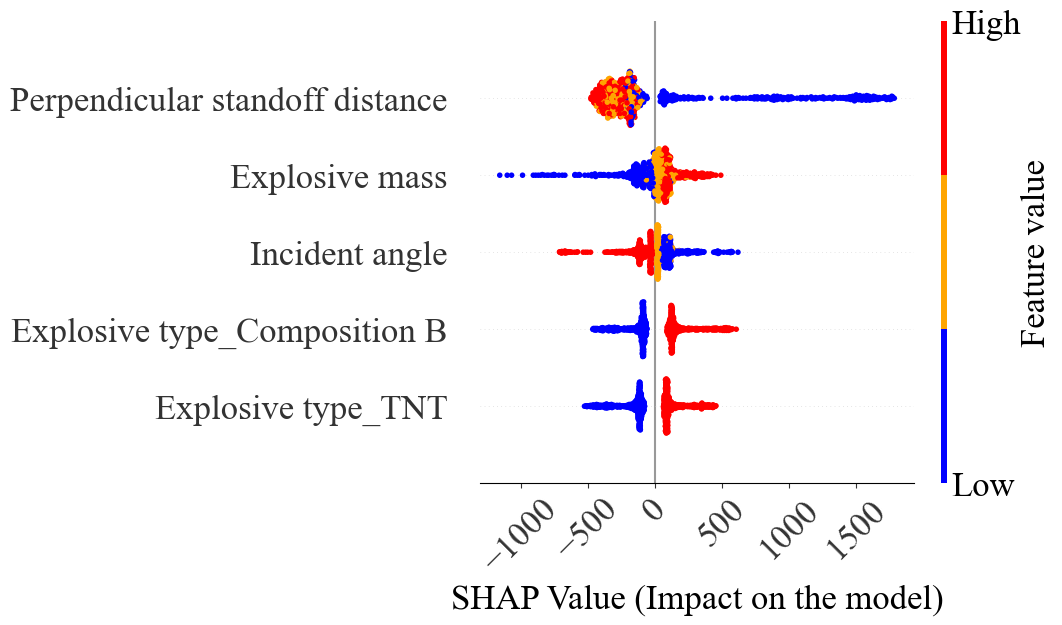

In [64]:
features = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Explosive type-CompB', 'Explosive type-TNT' ]
shap.plots.beeswarm(shap_values2, color =cmap, order=shap_values2.abs.max(0), show = False)
fig = plt.gcf()

plt.rcParams.update(plt.rcParamsDefault)
#plt.figure(facecolor='white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
#plt.rcParams['figure.facecolor'] = 'white'

fig.set_size_inches(7,6)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)

# Get colorbar
cb_ax = fig.axes[1]


# Modifying color bar parameters
cb_ax.tick_params(labelsize=25)
cb_ax.set_ylabel("Feature value", fontsize=25)
plt.savefig('SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()
feature_names=features

In [44]:
#Waterfall Plot (for an instance)
explainer3 = shap.Explainer(ann.predict, X_test)
#X_test.columns=features
shap_values3 = explainer3(X_test)

17/17 [==============================] - 0s 560us/step


ExactExplainer explainer:  15%|█▌        | 35/231 [00:00<?, ?it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  16%|█▌        | 37/231 [00:10<00:29,  6.64it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▋        | 38/231 [00:10<00:41,  4.69it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  17%|█▋        | 39/231 [00:11<00:48,  3.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 40/231 [00:11<00:52,  3.67it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  18%|█▊        | 41/231 [00:11<00:55,  3.42it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  18%|█▊        | 42/231 [00:12<00:54,  3.45it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  19%|█▊        | 43/231 [00:12<00:57,  3.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 44/231 [00:12<00:57,  3.26it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 45/231 [00:13<00:57,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 46/231 [00:13<00:59,  3.09it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  20%|██        | 47/231 [00:13<01:00,  3.03it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  21%|██        | 48/231 [00:14<01:00,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 49/231 [00:14<01:00,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 50/231 [00:14<00:58,  3.08it/s]

18/18 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 51/231 [00:15<01:00,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 52/231 [00:15<00:58,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 53/231 [00:15<00:58,  3.06it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  23%|██▎       | 54/231 [00:15<00:56,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▍       | 55/231 [00:16<00:54,  3.21it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  24%|██▍       | 56/231 [00:16<00:52,  3.31it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  25%|██▍       | 57/231 [00:16<00:52,  3.33it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  25%|██▌       | 58/231 [00:17<00:51,  3.39it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  26%|██▌       | 59/231 [00:17<00:50,  3.38it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 60/231 [00:17<00:52,  3.25it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▋       | 61/231 [00:18<00:51,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 62/231 [00:18<00:50,  3.38it/s]

17/17 [==============================] - 0s 974us/step


ExactExplainer explainer:  27%|██▋       | 63/231 [00:18<00:48,  3.43it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 64/231 [00:18<00:49,  3.36it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  28%|██▊       | 65/231 [00:19<00:51,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▊       | 66/231 [00:19<00:51,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 67/231 [00:19<00:53,  3.05it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 68/231 [00:20<00:52,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|██▉       | 69/231 [00:20<00:50,  3.23it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  30%|███       | 70/231 [00:20<00:48,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 71/231 [00:21<00:48,  3.29it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  31%|███       | 72/231 [00:21<00:48,  3.26it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  32%|███▏      | 73/231 [00:21<00:46,  3.40it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  32%|███▏      | 74/231 [00:22<00:49,  3.19it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 75/231 [00:22<00:46,  3.34it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  33%|███▎      | 76/231 [00:22<00:48,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 77/231 [00:23<00:48,  3.17it/s]

17/17 [==============================] - 0s 845us/step


ExactExplainer explainer:  34%|███▍      | 78/231 [00:23<00:46,  3.31it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  34%|███▍      | 79/231 [00:23<00:47,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▍      | 80/231 [00:23<00:48,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 81/231 [00:24<00:49,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 82/231 [00:24<00:49,  2.98it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  36%|███▌      | 83/231 [00:24<00:46,  3.18it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  36%|███▋      | 84/231 [00:25<00:45,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 85/231 [00:25<00:46,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 86/231 [00:25<00:45,  3.20it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 87/231 [00:26<00:44,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  38%|███▊      | 88/231 [00:26<00:46,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 89/231 [00:26<00:45,  3.12it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  39%|███▉      | 90/231 [00:27<00:43,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 91/231 [00:27<00:41,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 92/231 [00:27<00:41,  3.38it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  40%|████      | 93/231 [00:27<00:40,  3.43it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  41%|████      | 94/231 [00:28<00:41,  3.31it/s]

17/17 [==============================] - 0s 440us/step


ExactExplainer explainer:  41%|████      | 95/231 [00:28<00:41,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 96/231 [00:28<00:41,  3.25it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  42%|████▏     | 97/231 [00:29<00:43,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 98/231 [00:29<00:42,  3.17it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  43%|████▎     | 99/231 [00:29<00:44,  2.96it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  43%|████▎     | 100/231 [00:30<00:42,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 101/231 [00:30<00:41,  3.14it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  44%|████▍     | 102/231 [00:30<00:40,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 103/231 [00:31<00:40,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 104/231 [00:31<00:40,  3.10it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  45%|████▌     | 105/231 [00:31<00:38,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 106/231 [00:32<00:40,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▋     | 107/231 [00:32<00:39,  3.12it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 108/231 [00:32<00:39,  3.13it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  47%|████▋     | 109/231 [00:33<00:38,  3.14it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 110/231 [00:33<00:38,  3.11it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  48%|████▊     | 111/231 [00:33<00:36,  3.28it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 112/231 [00:34<00:37,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  49%|████▉     | 113/231 [00:34<00:38,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 114/231 [00:34<00:38,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 115/231 [00:35<00:37,  3.08it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  50%|█████     | 116/231 [00:35<00:36,  3.16it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  51%|█████     | 117/231 [00:35<00:34,  3.27it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  51%|█████     | 118/231 [00:35<00:34,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 119/231 [00:36<00:34,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 120/231 [00:36<00:36,  3.06it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  52%|█████▏    | 121/231 [00:36<00:34,  3.19it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 122/231 [00:37<00:34,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  53%|█████▎    | 123/231 [00:37<00:32,  3.35it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▎    | 124/231 [00:37<00:31,  3.41it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  54%|█████▍    | 125/231 [00:38<00:31,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 126/231 [00:38<00:31,  3.30it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 127/231 [00:38<00:32,  3.17it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  55%|█████▌    | 128/231 [00:38<00:30,  3.33it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  56%|█████▌    | 129/231 [00:39<00:31,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▋    | 130/231 [00:39<00:31,  3.18it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 131/231 [00:39<00:30,  3.23it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  57%|█████▋    | 132/231 [00:40<00:30,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 133/231 [00:40<00:30,  3.17it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 134/231 [00:40<00:29,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 135/231 [00:41<00:28,  3.31it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  59%|█████▉    | 136/231 [00:41<00:28,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 137/231 [00:41<00:28,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 138/231 [00:42<00:27,  3.33it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  60%|██████    | 139/231 [00:42<00:26,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 140/231 [00:42<00:26,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 141/231 [00:42<00:26,  3.34it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████▏   | 142/231 [00:43<00:27,  3.24it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 143/231 [00:43<00:26,  3.28it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  62%|██████▏   | 144/231 [00:43<00:25,  3.41it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 145/231 [00:44<00:24,  3.51it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  63%|██████▎   | 146/231 [00:44<00:25,  3.28it/s]

17/17 [==============================] - 0s 782us/step


ExactExplainer explainer:  64%|██████▎   | 147/231 [00:44<00:24,  3.39it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  64%|██████▍   | 148/231 [00:45<00:25,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▍   | 149/231 [00:45<00:25,  3.22it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▍   | 150/231 [00:45<00:25,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 151/231 [00:45<00:24,  3.31it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 152/231 [00:46<00:25,  3.13it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▌   | 153/231 [00:46<00:25,  3.11it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 154/231 [00:46<00:23,  3.23it/s]

17/17 [==============================] - 0s 848us/step


ExactExplainer explainer:  67%|██████▋   | 155/231 [00:47<00:23,  3.27it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  68%|██████▊   | 156/231 [00:47<00:23,  3.25it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  68%|██████▊   | 157/231 [00:47<00:22,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 158/231 [00:48<00:22,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 159/231 [00:48<00:21,  3.33it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  69%|██████▉   | 160/231 [00:48<00:20,  3.40it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  70%|██████▉   | 161/231 [00:48<00:20,  3.44it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|███████   | 162/231 [00:49<00:21,  3.26it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  71%|███████   | 163/231 [00:49<00:20,  3.24it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  71%|███████   | 164/231 [00:49<00:20,  3.33it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  71%|███████▏  | 165/231 [00:50<00:19,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 166/231 [00:50<00:19,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 167/231 [00:50<00:18,  3.39it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  73%|███████▎  | 168/231 [00:51<00:18,  3.39it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  73%|███████▎  | 169/231 [00:51<00:18,  3.38it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▎  | 170/231 [00:51<00:18,  3.32it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  74%|███████▍  | 171/231 [00:52<00:18,  3.29it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  74%|███████▍  | 172/231 [00:52<00:17,  3.31it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  75%|███████▍  | 173/231 [00:52<00:17,  3.33it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 174/231 [00:52<00:17,  3.34it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  76%|███████▌  | 175/231 [00:53<00:16,  3.40it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 176/231 [00:53<00:16,  3.24it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  77%|███████▋  | 177/231 [00:53<00:16,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 178/231 [00:54<00:16,  3.22it/s]

17/17 [==============================] - 0s 532us/step


ExactExplainer explainer:  77%|███████▋  | 179/231 [00:54<00:16,  3.06it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 180/231 [00:54<00:16,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 181/231 [00:55<00:15,  3.13it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  79%|███████▉  | 182/231 [00:55<00:16,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 183/231 [00:55<00:15,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 184/231 [00:56<00:14,  3.18it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  80%|████████  | 185/231 [00:56<00:14,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 186/231 [00:56<00:15,  2.99it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  81%|████████  | 187/231 [00:57<00:19,  2.20it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  81%|████████▏ | 188/231 [00:57<00:17,  2.39it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 189/231 [00:58<00:16,  2.57it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 190/231 [00:58<00:14,  2.77it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  83%|████████▎ | 191/231 [00:58<00:13,  2.96it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  83%|████████▎ | 192/231 [00:59<00:12,  3.07it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  84%|████████▎ | 193/231 [00:59<00:12,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 194/231 [00:59<00:12,  3.04it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  84%|████████▍ | 195/231 [01:00<00:11,  3.09it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  85%|████████▍ | 196/231 [01:00<00:11,  3.08it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  85%|████████▌ | 197/231 [01:00<00:10,  3.11it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  86%|████████▌ | 198/231 [01:01<00:10,  3.14it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  86%|████████▌ | 199/231 [01:01<00:09,  3.25it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  87%|████████▋ | 200/231 [01:01<00:09,  3.34it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 201/231 [01:01<00:09,  3.30it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 202/231 [01:02<00:08,  3.32it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  88%|████████▊ | 203/231 [01:02<00:08,  3.38it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  88%|████████▊ | 204/231 [01:02<00:07,  3.43it/s]

17/17 [==============================] - 0s 974us/step


ExactExplainer explainer:  89%|████████▊ | 205/231 [01:03<00:07,  3.36it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 206/231 [01:03<00:08,  3.07it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  90%|████████▉ | 207/231 [01:03<00:07,  3.16it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  90%|█████████ | 208/231 [01:04<00:07,  3.22it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 209/231 [01:04<00:06,  3.21it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 210/231 [01:04<00:06,  3.26it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  91%|█████████▏| 211/231 [01:04<00:06,  3.19it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  92%|█████████▏| 212/231 [01:05<00:05,  3.24it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 213/231 [01:05<00:05,  3.13it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  93%|█████████▎| 214/231 [01:05<00:05,  3.20it/s]

17/17 [==============================] - 0s 981us/step


ExactExplainer explainer:  93%|█████████▎| 215/231 [01:06<00:04,  3.30it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  94%|█████████▎| 216/231 [01:06<00:04,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 217/231 [01:06<00:04,  3.11it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 218/231 [01:07<00:04,  3.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 219/231 [01:07<00:03,  3.32it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▌| 220/231 [01:07<00:03,  3.39it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 221/231 [01:08<00:03,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 222/231 [01:08<00:02,  3.10it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 223/231 [01:08<00:02,  3.23it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 224/231 [01:09<00:02,  3.22it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  97%|█████████▋| 225/231 [01:09<00:01,  3.08it/s]

17/17 [==============================] - 0s 979us/step


ExactExplainer explainer:  98%|█████████▊| 226/231 [01:09<00:01,  3.02it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  98%|█████████▊| 227/231 [01:10<00:01,  3.17it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▊| 228/231 [01:10<00:00,  3.13it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 229/231 [01:10<00:00,  3.20it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|█████████▉| 230/231 [01:10<00:00,  3.25it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|██████████| 231/231 [01:11<00:00,  3.23it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 232it [01:11,  2.75it/s]                         


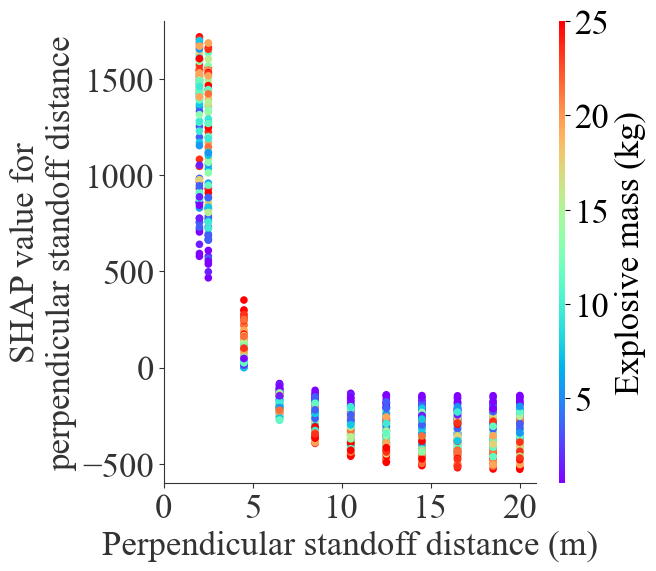

In [61]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Perpendicular standoff distance',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Explosive mass',
                     show=False, cmap='rainbow', dot_size = 30)
#shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig3 = plt.gcf()
plt.gcf().set_size_inches(6,6)
plt.ylabel("SHAP value for\nperpendicular standoff distance", fontsize = 25)
plt.xlabel("Perpendicular standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
#plt.xlim (0, 21)
plt.ylim (-600, 1800)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=25)
cb_ax3.set_ylabel("Explosive mass (kg)", fontsize=25)
plt.savefig('SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

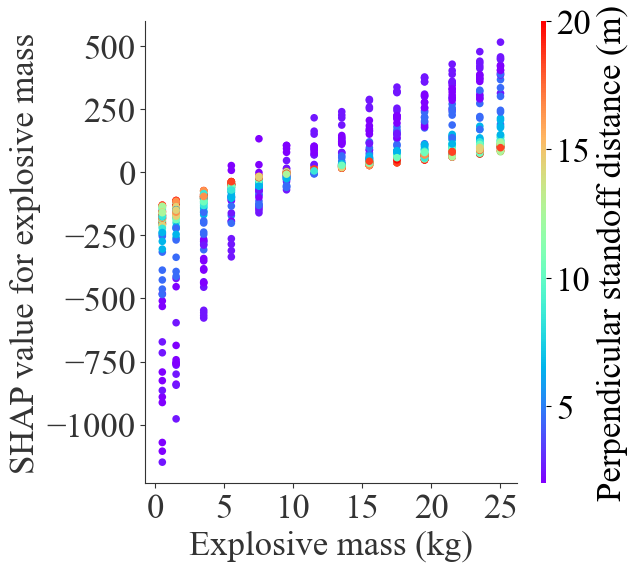

In [60]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Explosive mass',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Perpendicular standoff distance',
                     show=False, cmap='rainbow', dot_size = 30)
#shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig4 = plt.gcf()
plt.gcf().set_size_inches(6,6)
plt.ylabel("SHAP value for explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
#plt.xlim (0, 21)
#plt.ylim (-4000, 4000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax4 = fig4.axes[1] 

# Modifying color bar parameters
cb_ax4.tick_params(labelsize=25)
cb_ax4.set_ylabel("Perpendicular standoff distance (m)", fontsize=25)
plt.savefig('SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [54]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['purple','cyan','green','orange','red']))

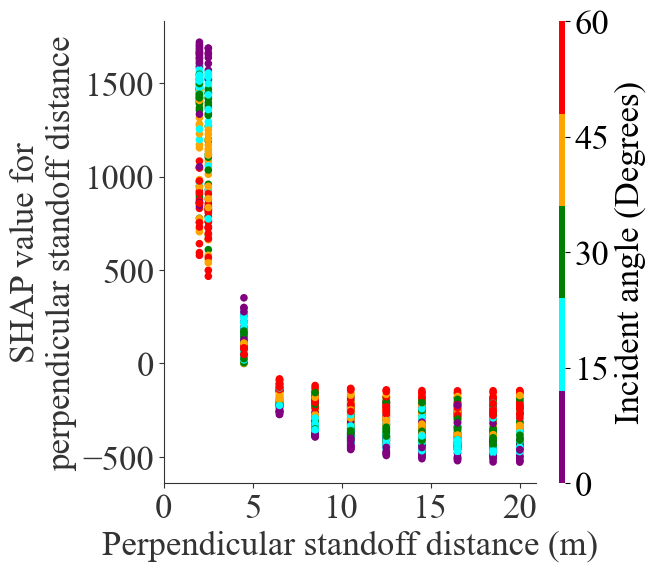

In [58]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Perpendicular standoff distance',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Incident angle',
                     show=False, cmap=cmap, dot_size = 30)
#shap.dependence_plot(0, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig5 = plt.gcf()
plt.gcf().set_size_inches(6,6)
plt.ylabel("SHAP value for\nperpendicular standoff distance", fontsize = 25)
plt.xlabel("Perpendicular standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
#plt.xlim (0, 26)
#plt.ylim (-2000, 10000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax5 = fig5.axes[1] 

# Modifying color bar parameters
cb_ax5.tick_params(labelsize=25)
cb_ax5.set_yticks(ticks = [0, 15, 30, 45, 60])
cb_ax5.set_ylabel("Incident angle (Degrees)", fontsize=25)
plt.savefig('SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()

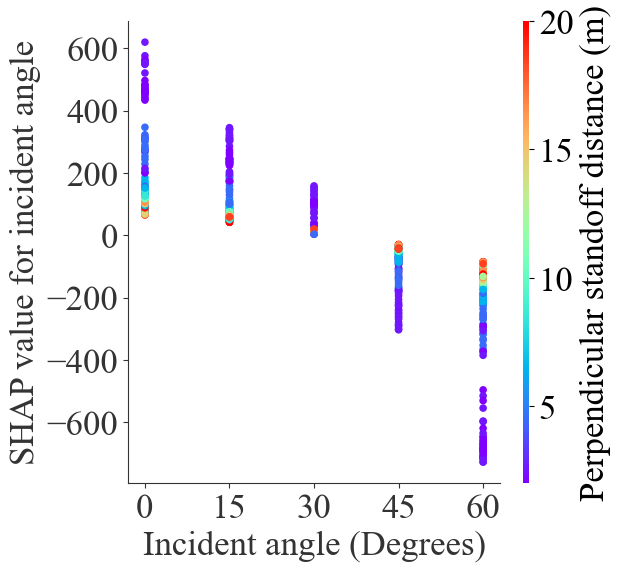

In [59]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Incident angle',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Perpendicular standoff distance',
                     show=False, cmap='rainbow', dot_size = 30)
fig6 = plt.gcf()
plt.gcf().set_size_inches(6,6)
plt.ylabel("SHAP value for incident angle", fontsize = 25)
plt.xlabel("Incident angle (Degrees)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 15, 30, 45, 60],fontsize = 25)
#plt.xlim (0, 26)
#plt.ylim (-4000, 3000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax6 = fig6.axes[1] 

# Modifying color bar parameters
cb_ax6.tick_params(labelsize=25)
#cb_ax6.set_yticks(ticks = [0, 5, 10, 15, 20])
cb_ax6.set_ylabel("Perpendicular standoff distance (m)", fontsize=25)
plt.savefig('SHAP6.png', dpi = 600, bbox_inches = 'tight')
plt.show()